In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
train.Fare.groupby(train['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [8]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
df2 = train[['Sex', 'Survived']].groupby('Sex').mean()
df2

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by gender')

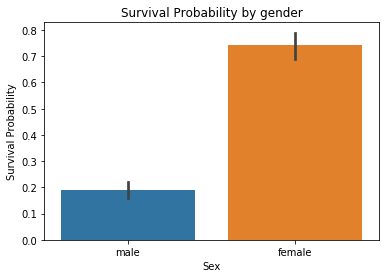

In [5]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by gender')

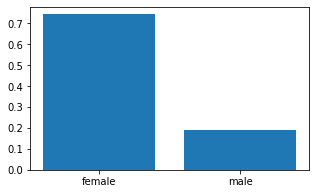

In [6]:
s = ['female', 'male']
sd = [0.742038, 0.188908]

plt.figure(figsize=(5,3))
plt.bar(s, sd)
plt.show()

## Handling Missing Data

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

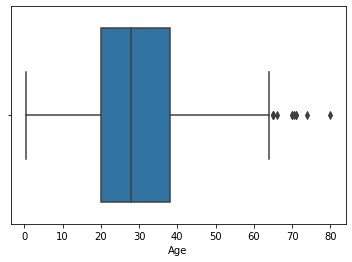

In [28]:
sns.boxplot(train['Age'])

In [34]:
train[['Age', 'Survived']].sort_values('Age', ascending=False).head(10)

,Age,Survived
630,80.0,1
851,74.0,0
493,71.0,0
96,71.0,0
116,70.5,0
672,70.0,0
745,70.0,0
33,66.0,0
54,65.0,0
280,65.0,0


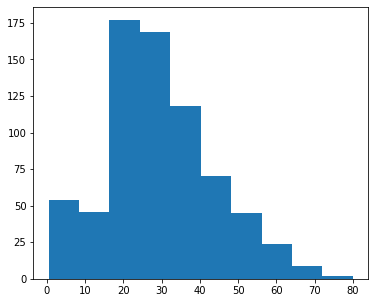

In [36]:
plt.figure(figsize=(6,5))
plt.hist(train['Age'])
plt.show()

In [38]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [43]:
train[['Cabin', 'Survived']].groupby('Cabin').median()

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0
...,...
F33,1.0
F38,0.0
F4,1.0


#### For now, let's just drop the cabin value, as there are too many NaNs

In [7]:
train.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Now, let's fill in the empty Age values with generic numbers based on average values according to class and sex

In [8]:
train[['Age', 'Survived', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex']).mean()

Age  Survived
Pclass Sex                        
1      female  34.611765  0.968085
       male    41.281386  0.368852
2      female  28.722973  0.921053
       male    30.740707  0.157407
3      female  21.750000  0.500000
       male    26.507589  0.135447

In [61]:
train['Age'].loc[888].replace(NaN, 22)

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [62]:
# Orr, we can just output all male passengers older than 20 that have 'James' in their names. idk why bwt
train[(train.Age > 20) & (train.Sex == 'male') & (train.Name.str.contains('James'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S


In [9]:
train['Age'] = train.fillna(train['Age'].median())['Age']

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.Sex = train.Sex.replace(to_replace='male', value=1)
train.Sex = train.Sex.replace(to_replace='female', value=0)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's try to solve it with Keras

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [70]:
x = np.column_stack((train.Pclass.values, train.Sex.values, train.Age.values, train.SibSp.values, train.Parch.values, train.Fare.values))

In [71]:
model = keras.Sequential([
    layers.Dense(6, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.optimizer.lr = 0.001
model.fit(x, train.Survived.values, batch_size=5, epochs=18)

Epoch 1/18
179/179 [==============================] - 0s 955us/step - loss: 0.7466 - accuracy: 0.6207
Epoch 2/18
179/179 [==============================] - 0s 984us/step - loss: 0.6507 - accuracy: 0.6652
Epoch 3/18
179/179 [==============================] - 0s 961us/step - loss: 0.6389 - accuracy: 0.6747
Epoch 4/18
179/179 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7032
Epoch 5/18
179/179 [==============================] - 0s 969us/step - loss: 0.5978 - accuracy: 0.6966
Epoch 6/18
179/179 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.6798
Epoch 7/18
179/179 [==============================] - 0s 983us/step - loss: 0.6042 - accuracy: 0.6941
Epoch 8/18
179/179 [==============================] - 0s 952us/step - loss: 0.5532 - accuracy: 0.7161
Epoch 9/18
179/179 [==============================] - 0s 972us/step - loss: 0.4990 - accuracy: 0.7650
Epoch 10/18
179/179 [==============================] - 0s 965us/step - loss: 0.5015 - 

In [60]:
test = pd.read_csv('test.csv')
test.Sex = test.Sex.replace(to_replace='male', value=1)
test.Sex = test.Sex.replace(to_replace='female', value=0)
test = test.drop(['Cabin', 'Name', 'PassengerId', 'Embarked'], axis=1)
test = test.drop(['Ticket'], axis=1)
test['Age'] = test.fillna(test['Age'].median())['Age']

In [72]:
test1 = np.column_stack((test.Pclass.values, test.Sex.values, test.Age.values, test.SibSp.values, test.Parch.values, test.Fare.values))

In [73]:
x

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [74]:
test1

array([[ 3.    ,  1.    , 34.5   ,  0.    ,  0.    ,  7.8292],
       [ 3.    ,  0.    , 47.    ,  1.    ,  0.    ,  7.    ],
       [ 2.    ,  1.    , 62.    ,  0.    ,  0.    ,  9.6875],
       ...,
       [ 3.    ,  1.    , 38.5   ,  0.    ,  0.    ,  7.25  ],
       [ 3.    ,  1.    , 27.    ,  0.    ,  0.    ,  8.05  ],
       [ 3.    ,  1.    , 27.    ,  1.    ,  1.    , 22.3583]])

In [75]:
model.predict(test1, batch_size = 10)

array([[ 1.28873813e+00, -1.01976514e+00],
       [ 3.46902847e-01, -1.64218679e-01],
       [ 1.25057447e+00, -9.59563911e-01],
       [ 1.15659571e+00, -8.99753392e-01],
       [ 3.37363482e-02,  9.36533883e-02],
       [ 8.62975419e-01, -6.16030097e-01],
       [-1.17241696e-01,  2.14930207e-01],
       [ 7.52049088e-01, -8.20672929e-01],
       [-2.32483581e-01,  3.09005439e-01],
       [ 1.17970645e+00, -1.14373624e+00],
       [ 1.16304231e+00, -8.94778311e-01],
       [ 4.31520820e-01, -2.39827797e-01],
       [-1.56794572e+00,  1.37807143e+00],
       [ 1.12557888e+00, -7.99632788e-01],
       [-1.38199663e+00,  1.07974625e+00],
       [-7.00469732e-01,  5.67077696e-01],
       [ 8.97059977e-01, -6.86552405e-01],
       [ 1.05481851e+00, -7.73717940e-01],
       [ 8.83536786e-02,  2.20801383e-02],
       [ 7.82141238e-02,  6.65833503e-02],
       [ 7.07509071e-02, -3.35613608e-01],
       [ 4.09266233e-01, -1.49796382e-01],
       [-1.31716990e+00,  1.12748194e+00],
       [-1.

In [88]:
model = keras.Sequential([
    layers.Dense(2, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

x = np.column_stack((train.Pclass.values, train.Age.values))

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x, train.Survived.values, batch_size=2, epochs=10)

Epoch 1/10
446/446 [==============================] - 1s 897us/step - loss: 0.6852 - accuracy: 0.6125
Epoch 2/10
446/446 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6166
Epoch 3/10
446/446 [==============================] - 0s 950us/step - loss: 0.6727 - accuracy: 0.60500s - loss: 0.6914 - ac
Epoch 4/10
446/446 [==============================] - 0s 873us/step - loss: 0.6565 - accuracy: 0.6374
Epoch 5/10
446/446 [==============================] - 0s 937us/step - loss: 0.6580 - accuracy: 0.6331
Epoch 6/10
446/446 [==============================] - 0s 907us/step - loss: 0.6507 - accuracy: 0.6493
Epoch 7/10
446/446 [==============================] - 0s 892us/step - loss: 0.6650 - accuracy: 0.6164
Epoch 8/10
446/446 [==============================] - 0s 898us/step - loss: 0.6514 - accuracy: 0.6434
Epoch 9/10
446/446 [==============================] - 0s 899us/step - loss: 0.6648 - accuracy: 0.6173
Epoch 10/10
446/446 [==============================] - 0s 937u

## Hyperparamater Tuning

In [ ]:
def build_model(hp):
    model.keras.models.Sequential()
    model.add(Dense(6, activation='relu')),
    model.add(Dense(256, activation='relu')),
    model.add(Dense(2))
    
    

In [92]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


SyntaxError: invalid syntax (<ipython-input-92-a746befdacc1>, line 1)

In [98]:
train.pivot_table('Survived', index='Embarked', columns='Sex')

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


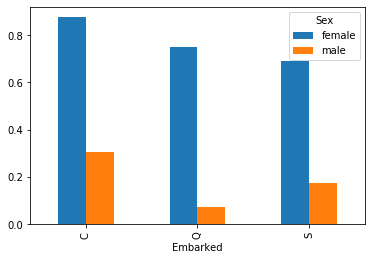

In [85]:
train.pivot_table('Survived', index='Embarked', columns='Sex').plot(kind='bar')

In [ ]:
train

### Some Graphs
At this stage we are trying to figure out are there any certain patterns in the data that a NN can learn on.

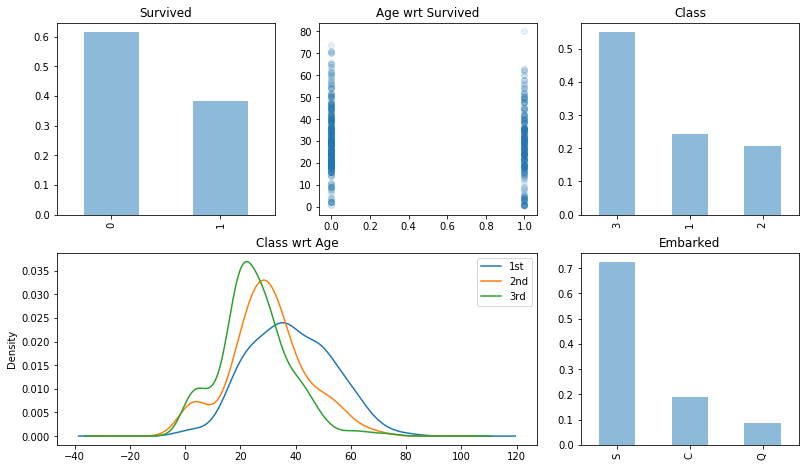

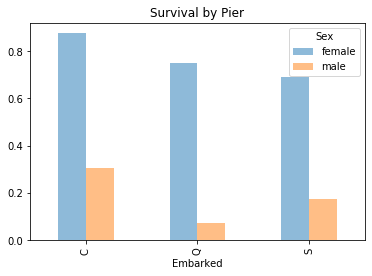

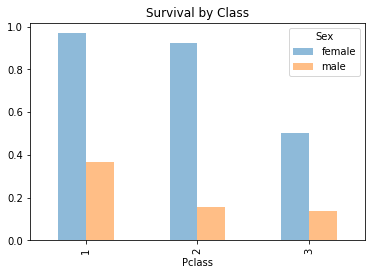

In [97]:
fig = plt.figure(figsize=(18,12))

plt.subplot2grid((3,4), (0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4), (0,1))
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title('Age wrt Survived')

plt.subplot2grid((3,4), (0,2))
train.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Class')

plt.subplot2grid((3,4), (1,0), colspan=2)
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((3,4), (1,2))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Embarked')


train.pivot_table('Survived', index='Embarked', columns='Sex').plot(kind='bar', alpha=0.5)
plt.title('Survival by Pier')


train.pivot_table('Survived', index='Pclass', columns='Sex').plot(kind='bar', alpha=0.5)
plt.title('Survival by Class')

plt.show()

### Analysis of Genders and Classes

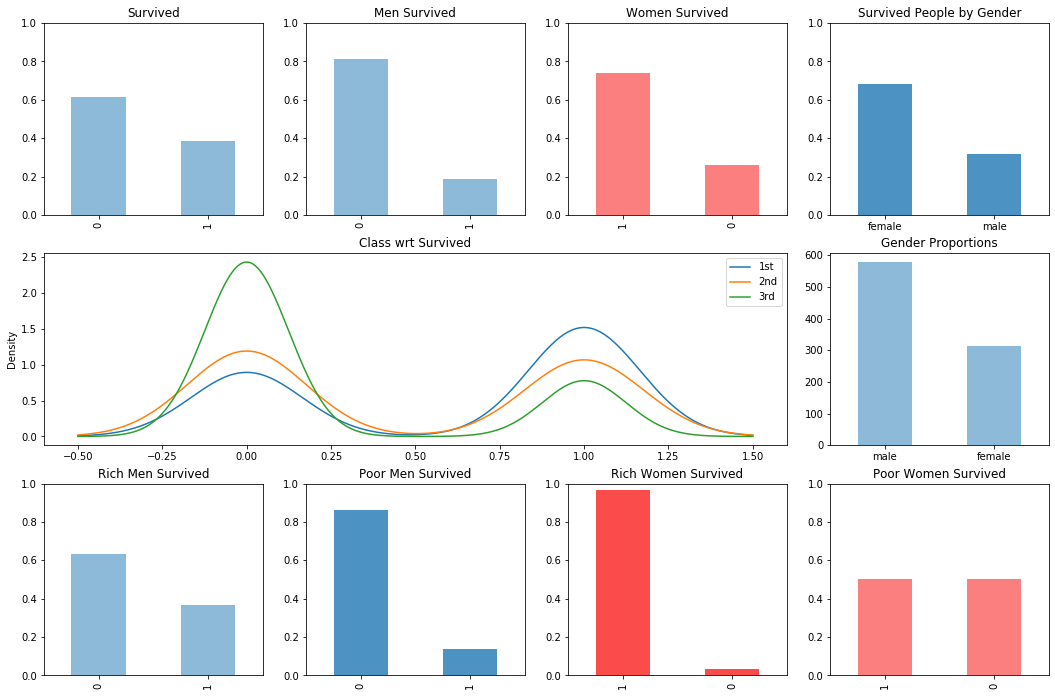

In [68]:
female_color = '#FA0000'

fig = plt.figure(figsize=(18,12))

plt.subplot2grid((3,4), (0,0))
plt.ylim(ymin=0, ymax=1)
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4), (0,1))
plt.ylim(ymin=0, ymax=1)
train.Survived[train.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4), (0,2))
plt.ylim(ymin=0, ymax=1)
train.Survived[train.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')

plt.subplot2grid((3,4), (0,3))
plt.ylim(ymin=0, ymax=1)
train.Sex[train.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.8)
plt.xticks(rotation='horizontal')
plt.title('Survived People by Gender')

plt.subplot2grid((3,4), (1,0), colspan=3)
for x in [1,2,3]:
    train.Survived[train.Pclass == x].plot(kind='kde')
plt.title('Class wrt Survived')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((3,4), (1,3))
train.Sex.value_counts(normalize=False).plot(kind='bar', alpha=0.5)
plt.xticks(rotation='horizontal')
plt.title('Gender Proportions')

plt.subplot2grid((3,4), (2,0))
plt.ylim(ymin=0, ymax=1)
train.Survived[(train.Pclass == 1) & (train.Sex == 'male')].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Rich Men Survived')

plt.subplot2grid((3,4), (2,1))
plt.ylim(ymin=0, ymax=1)
train.Survived[(train.Sex == 'male') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.8)
plt.title('Poor Men Survived')

plt.subplot2grid((3,4), (2,2))
plt.ylim(ymin=0, ymax=1)
train.Survived[(train.Pclass == 1) & (train.Sex == 'female')].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=female_color)
plt.title('Rich Women Survived')

plt.subplot2grid((3,4), (2,3))
plt.ylim(ymin=0, ymax=1)
train.Survived[(train.Sex == 'female') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Poor Women Survived')

plt.show()

### Age Analysis

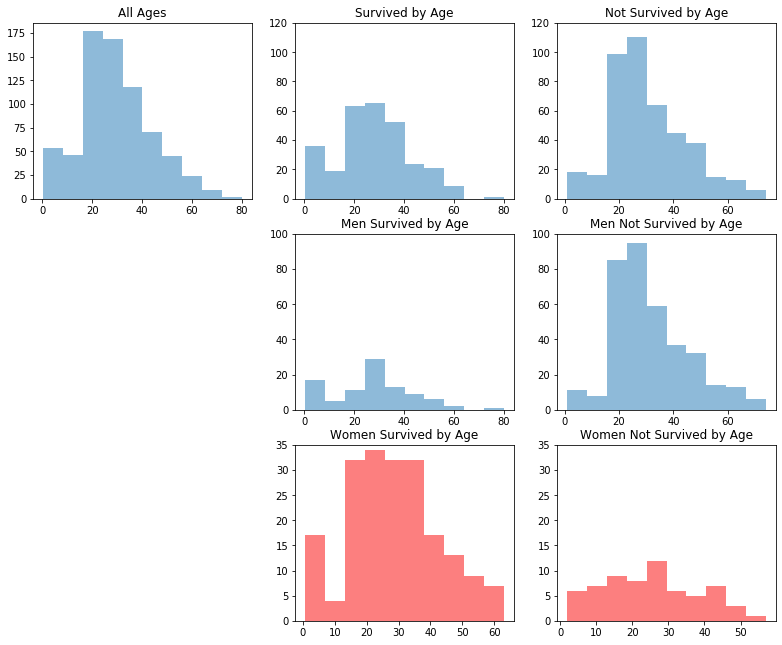

In [69]:
plt.figure(figsize=(18,11))

plt.subplot2grid((3,4), (0,0))
plt.hist(train['Age'], alpha=0.5)
plt.title('All Ages')

plt.subplot2grid((3,4), (0,1))
plt.ylim(ymin=0, ymax=120)
plt.hist(train.Age[train.Survived == 1], alpha=0.5)
plt.title('Survived by Age')

plt.subplot2grid((3,4), (0,2))
plt.ylim(ymin=0, ymax=120)
plt.hist(train.Age[train.Survived == 0], alpha=0.5)
plt.title('Not Survived by Age')

plt.subplot2grid((3,4), (1,1))
plt.ylim(ymin=0, ymax=100)
plt.hist(train.Age[(train.Survived == 1) & (train.Sex == 'male')], alpha=0.5)
plt.title('Men Survived by Age')

plt.subplot2grid((3,4), (1,2))
plt.ylim(ymin=0, ymax=100)
plt.hist(train.Age[(train.Survived == 0) & (train.Sex == 'male')], alpha=0.5)
plt.title('Men Not Survived by Age')

plt.subplot2grid((3,4), (2,1))
plt.ylim(ymin=0, ymax=35)
plt.hist(train.Age[(train.Survived == 1) & (train.Sex == 'female')], color=female_color, alpha=0.5)
plt.title('Women Survived by Age')

plt.subplot2grid((3,4), (2,2))
plt.ylim(ymin=0, ymax=35)
plt.hist(train.Age[(train.Survived == 0) & (train.Sex == 'female')], color=female_color, alpha=0.5)
plt.title('Women Not Survived by Age')

plt.show()

The only visible pattern here is that infants have higher probability of survival

In [103]:
def clean_data(data):
    data.drop(columns='Cabin')
    data['Age'] = data['Age'].fillna(data.Age.dropna().median())
    
    data.loc[data.Sex == 'male', 'Sex'] = 0
    data.loc[data.Sex == 'female', 'Sex'] = 1
    
    data.loc[data.Embarked == 'S', 'Embarked'] = 0
    data.loc[data.Embarked == 'C', 'Embarked'] = 1
    data.loc[data.Embarked == 'Q', 'Embarked'] = 2
    
    data = data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

In [111]:
clean_data(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [127]:
train[(train.Embarked != 1) & (train.Embarked != 0) & (train.Embarked != 2)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


In [146]:
# Okay, super-cool useless automation time
for x in (61, 829):
    train['Embarked'].loc[x].replace(nan, 0)

AttributeError: 'float' object has no attribute 'replace'

In [150]:
train['Embarked'] = train['Embarked'].fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [164]:
from sklearn import linear_model, preprocessing

target = train.Survived.values
feature_names = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare']
features = train[feature_names].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

print(classifier_.score(features, target))

poly = preprocessing.PolynomialFeatures(degree=1)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)

print(classifier_.score(poly_features, target))

0.8013468013468014
0.7991021324354658


C:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOG

In [169]:
from sklearn import tree, model_selection

target = train.Survived.values
feature_names = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare']
features = train[feature_names].values

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree_ = decision_tree.fit(features, target)

print(decision_tree_.score(features, target))

scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50)
print(scores)
print(scores.mean())

0.9797979797979798
[0.66666667 0.61111111 0.66666667 0.88888889 0.94444444 0.94444444
 0.72222222 0.77777778 0.72222222 0.77777778 0.72222222 0.61111111
 0.72222222 0.77777778 0.55555556 0.83333333 0.94444444 0.66666667
 0.77777778 0.77777778 0.88888889 0.72222222 0.88888889 0.72222222
 0.55555556 0.83333333 0.94444444 0.88888889 0.66666667 0.83333333
 0.72222222 0.66666667 0.88888889 0.94444444 0.88888889 0.77777778
 0.72222222 0.72222222 0.72222222 0.77777778 0.88888889 0.82352941
 0.70588235 0.82352941 0.82352941 0.70588235 0.82352941 0.82352941
 0.88235294 0.88235294]
0.781437908496732


In [173]:
generalized_tree = tree.DecisionTreeClassifier(
    random_state = 1,
    max_depth = 7,
    min_samples_split = 2
)
generalized_tree_ = generalized_tree.fit(features, target)

print(generalized_tree_.score(features, target))

scores = model_selection.cross_val_score(generalized_tree, features, target, scoring='accuracy', cv=50)
print(scores)
print(scores.mean())

tree.export_graphviz(generalized_tree_, feature_names=feature_names, out_file='tree.dot')


0.8787878787878788
[0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.61111111 0.83333333 0.88888889 0.88888889 0.72222222 0.66666667
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.83333333 0.88888889 0.83333333 0.83333333 0.88888889
 0.94444444 0.83333333 0.83333333 0.83333333 0.77777778 0.88888889
 0.72222222 0.66666667 0.88888889 0.88888889 0.83333333 0.77777778
 0.72222222 0.66666667 0.88888889 0.77777778 0.83333333 0.88235294
 0.76470588 0.88235294 0.88235294 0.70588235 0.88235294 0.76470588
 1.         0.94117647]
0.8207843137254901


In [186]:
from sklearn.model_selection import GridSearchCV


In [188]:
grid_search = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.001,
        min_samples_split=40,
        min_samples_leaf=1,
        max_features=2,
        max_depth=12,
        n_estimators=70,
        subsample=0.75,
        random_state=10), 
    param_grid = {'n_estimators':[140, 280, 560, 1120, 4480]},
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=10)

grid_search.fit(features, target)


C:\conda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None,
                                                  learning_rate=0.001,
                                                  loss='deviance', max_depth=12,
                                                  max_features=2,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=40,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=70,
                               

In [ ]:
print(grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_)